<a href="https://colab.research.google.com/github/gastan81/homework-0/blob/master/8_bonus_openai_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatGPT

Perhaps the most famous AI currently on the market, [ChatGPT](https://openai.com/chatgpt) is nonetheless limited in its interaction with the user in a data-analysis setting.

We can, however, utilize the power of the [OpenAI API](https://platform.openai.com/docs/introduction) to integrate an AI assistant directly into our notebooks.

> **Note:** We will be using *GPT-3.5-turbo* throughout this tutorial. Access to this model is *not free*. To get started with the OpenAI API you will need to [sign up](https://platform.openai.com/signup) and get an [API key](https://platform.openai.com/account/api-keys).

In [ ]:
from google.colab import userdata
API_key = userdata.get('ChatGPT')

In [ ]:
API_key = 'YOUR API KEY HERE'

## Setting up

In [ ]:
# in Colab, run this line at the start of every session
# working locally, installation only needs to happen once
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


Here we see the basic architecture of an OpenAI API call. By adjusting the value of the `content` key in the second dictionary in `messages` (the one with the role "user"), we send queries - also known as prompts - to the AI.

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=API_key)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are an assistant in a data science bootcamp, capable of providing insight and guidance, and writing and debugging code."},
    {"role": "user", "content": "What are the essential libraries to install for a data analysis project?"}
  ]
)

Responses will be stored within the `completion` object:

In [ ]:
print(completion.choices[0].message.content)

There are several essential libraries that you should install for a data analysis project in Python. Some of the commonly used ones include:

1. Numpy: Used for numerical computations and handling arrays and matrices efficiently.
```
pip install numpy
```

2. Pandas: Used for data manipulation, cleaning, and analysis, providing data structures like DataFrame.
```
pip install pandas
```

3. Matplotlib: A powerful plotting library for creating visualizations like line plots, scatter plots, histograms, etc.
```
pip install matplotlib
```

4. Seaborn: Built on top of Matplotlib, it provides a high-level interface for creating attractive statistical graphics.
```
pip install seaborn
```

5. Scikit-learn: A versatile machine learning library that provides various algorithms for classification, regression, clustering, etc.
```
pip install scikit-learn
```

6. SciPy: A library that provides scientific and numerical computing functions, including optimization, integration, linear algebra, etc.


Rather than modifying one block of code repeatedly, we can instead place our API call in a function:

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=API_key)
def ask_AI(prompt):
    completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are an assistant in a data science bootcamp, capable of providing insight and guidance, and writing and debugging code."},
        {"role": "user", "content": prompt}
    ]
    )
    print(completion.choices[0].message.content)

In [ ]:
ask_AI("What are the essential libraries to install for a data analysis project?")

There are several essential libraries to install for a data analysis project in Python. Some of the most commonly used libraries are:

1. NumPy: A library for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions.

2. Pandas: A library for data manipulation and analysis. It provides data structures such as Series (1-dimensional array) and DataFrame (2-dimensional table), which are very useful for working with structured data.

3. Matplotlib: A plotting library for creating 2D and simple 3D plots. It provides a wide variety of functions to visualize data in different formats such as line plots, scatter plots, histograms, etc.

4. Seaborn: A higher-level interface to matplotlib. It provides a more aesthetic and easy-to-use visualization style compared to Matplotlib, especially for statistical data visualization.

5. Scikit-learn: A machine learning library for building predictive model

We may wish to keep up a conversation with our AI, in which case we modify our code to keep track of prompts and responses. In this way, the AI will review the conversation history each time a new query is posed, giving more context to inform its answers.

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=API_key)
messages = []
def chat_AI(prompt):
    global messages # this sets the scope of messages to global, so we can make changes to the list without explictly passing the list to our function each call
    if len(messages) == 0:
        messages = [{"role": "system",
                    "content": "You are an assistant in a data science bootcamp, capable of providing insight and guidance, and writing and debugging code."},
                    ]
    messages.append({"role": "user",
                    "content": prompt}
                    )
    completion = client.chat.completions.create(
                    model="gpt-3.5-turbo",
                    messages=messages
                    )
    reply = completion.choices[0].message.content
    messages.append({"role": "assistant",
                     "content": reply}
                    )
    print(reply)

# to restart the conversation we clear the messages
def clear_chat():
    global messages
    messages.clear()

## Prompts

Let's find some uses for our AI tool. We'll start by loading the data from our project.

In [ ]:
import pandas as pd
# orders.csv
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines.csv
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products.csv
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
# We'll clear the chat of any previous prompts first
clear_chat()

In [ ]:
# Here we see how to convert one column of our dataframe to a string
# For these API calls, we need to pass strings for the AI to read our data
str(orderlines["unit_price"].values)

"['18.99' '399.00' '474.05' ... '9.99' '19.99' '13.99']"

In [ ]:
chat_AI("""In this series of numbers, some contain more than one period.
Find three examples of these numbers with more than one period.

Numbers: {}
""".format(str(orderlines["unit_price"].values)))
# since we've used a multi-line string to help format our prompt, we cannot make it an f-string!
# lucky the legacy method str.format() allows us to still pass data!

To find three examples of numbers with more than one period, we can iterate through the given list of numbers and check if a number contains more than one period. Here's how you can do it:

```python
numbers = ['18.99', '399.00', '474.05', '9.99', '19.99', '13.99']

counter = 0
results = []

for number in numbers:
    if number.count('.') > 1:
        results.append(number)
        counter += 1
        if counter == 3:
            break

print(results)
```

Output:
```
['18.99', '399.00', '474.05']
```

The code iterates through each number in the `numbers` list and uses the `count()` method to count the number of occurrences of the decimal point in the number. If the count is greater than 1, it is considered to have more than one period and will be added to the `results` list. We also use a counter to limit the number of results to 3. When the counter reaches 3, the loop breaks. Finally, we print the `results` list which contains the three numbers with more than one period.


This was not the expected response, but we can use it -- with modifications.

In [ ]:
counter = 0
results = []

for number in orderlines["unit_price"].to_list(): # replace numbers with a list of unit_price
    if number.count(r'.') > 1:      # put a raw string in the count method, so it does not read '.' as a wildcard
        results.append(number)
        counter += 1
        if counter == 3:
            break
results

['1.137.99', '2.565.99', '3.278.99']

Now let's use this result to find all of our unit prices with two dots. Notice the amount of context given to help shape the outcome.

In [ ]:
chat_AI("""Write a statement in python. The statement should:
1. Search a column named 'unit_price' in a dataframe named 'orderlines'. Use the pandas library.
2. Find entries matching the pattern ['1.137.99', '2.565.99', '3.278.99']. Use regex.
3. Return all rows of the dataframe 'orderlines' matching this pattern. Use the .loc attribute to do so.
""")

Certainly! Here's the statement that achieves the tasks you mentioned:

```python
import pandas as pd

orderlines = pd.DataFrame(...) # Assuming you already have a dataframe named 'orderlines'

pattern = r'[0-9]{1}\.[0-9]{3}\.[0-9]{2}'
matches = orderlines.loc[orderlines['unit_price'].str.contains(pattern, regex=True)]

print(matches)
```

Similarly, replace `...` in `orderlines = pd.DataFrame(...)` with the appropriate data to create the `orderlines` dataframe.

In this statement, we once again import the `pandas` library for working with dataframes. We define the regex pattern `r'[0-9]{1}\.[0-9]{3}\.[0-9]{2}'`. This pattern matches a number with a single digit followed by a period, then 3 digits followed by another period, and finally 2 digits.

Next, we use the `str.contains()` method on the 'unit_price' column of the `orderlines` dataframe to find rows that match the pattern. Setting `regex=True` allows us to use regex patterns in the search.

Finally, we use the `.loc` attribute o

In [ ]:
# we copy and paste from the response
# rather than using a print statement as above, we can directly display the output
pattern = r'[0-9]{1,3}\.[0-9]{3}\.[0-9]{2}'
orderlines.loc[orderlines['unit_price'].str.contains(pattern, regex=True)]

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11
...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51


With the help of our assistant, we've found the orderlines with corrupted unit prices! Maybe it could be used to help clean the prices, rather than dropping them all..

## Assistants API

Thus far, we have only been able to give limited data, in the form of strings, to our AI. We can create a more advanced Assistant capable of reading files hosted by OpenAI.

### Uploading files

Since each upload will return a `FileObject` containing a file ID which the Assistant will need to access the file, we will create a dictionary to hold them.

In [ ]:
uploaded_files = {}

At the time of writing, files could not be uploaded directly from a Google Drive link.

We can, however, add files to our working directory by clicking the 'file folder' and dragging the file or files into the space. File paths then work as locally, but all files will be deleted from the directory after the session is terminated.



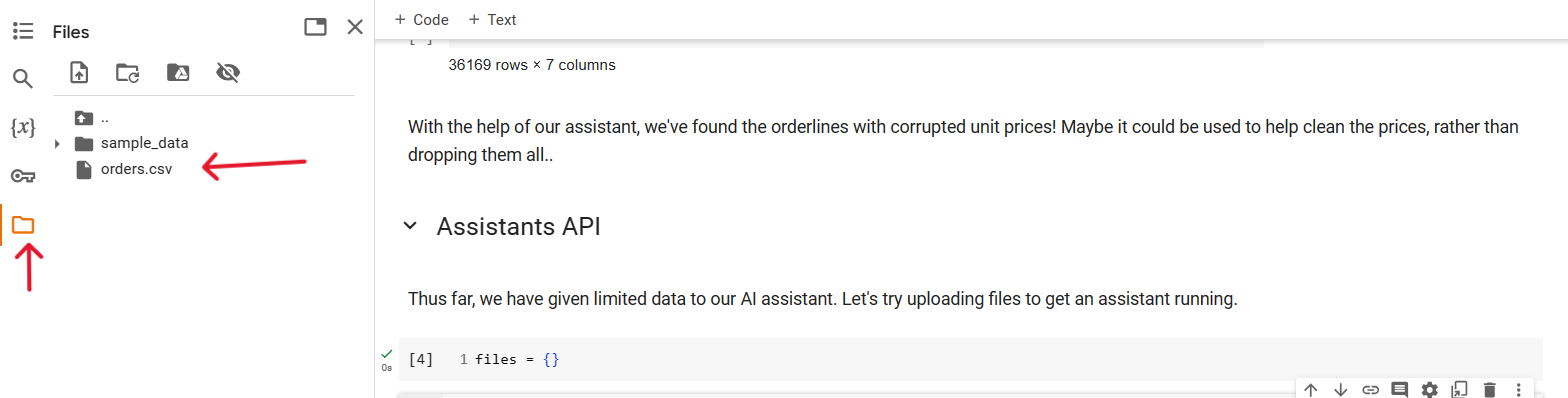

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=API_key)

In [ ]:
# upload file and save metadata keyed to the file name
# to be used by the Assistant, files must have the purpose "assistants"
uploaded_files["orders"] = client.files.create(
  file=open("./orders.csv", "rb"),
  purpose="assistants"
)

In [ ]:
uploaded_files["orderlines"] = client.files.create(
  file=open("./orderlines.csv", "rb"),
  purpose="assistants"
)
uploaded_files["products"] = client.files.create(
  file=open("./products.csv", "rb"),
  purpose="assistants"
)
uploaded_files["brands"] = client.files.create(
  file=open("./brands.csv", "rb"),
  purpose="assistants"
)

We now save our dictionary of uploaded file information as a serialized binary, or 'pickle'. This pickle can later be read to restore the dictionary.

In [ ]:
import pickle

# serialize the dictionary
with open("uploaded_files.pkl", "wb") as f:
    pickle.dump(uploaded_files, f)

# download a copy of the serialized file for local storage
from google.colab import files
files.download("uploaded_files.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# to restore the file

# import pickle
# with open("uploaded_files.pkl", "rb") as f:
#     uploaded_files = pickle.load(f)

To see the file ID of the uploaded `"orders.csv"`, we access the `FileObject` with the appropriate key and use the `.id` attribute.

In [ ]:
uploaded_files["orders"].id

'file-NmFKe94PKSecpFgna7gOxQl9'

If lost, we can recover information about our uploaded files with the `files.list()` method:

In [ ]:
client.files.list()

SyncPage[FileObject](data=[FileObject(id='file-AxtjJeXUsHWsx1RMMypTngZx', bytes=2251, created_at=1703502197, filename='brands.csv', object='file', purpose='assistants', status='processed', status_details=None), FileObject(id='file-csPdJbJVZCptb34gnzfSTYxC', bytes=3275691, created_at=1703502196, filename='products.csv', object='file', purpose='assistants', status='processed', status_details=None), FileObject(id='file-EOiEGPwHMYtHE7gaIDxn0R1Z', bytes=15802200, created_at=1703502194, filename='orderlines.csv', object='file', purpose='assistants', status='processed', status_details=None), FileObject(id='file-NmFKe94PKSecpFgna7gOxQl9', bytes=10596923, created_at=1703499846, filename='orders.csv', object='file', purpose='assistants', status='processed', status_details=None)], object='list', has_more=False)

### Initializing the Assistant

With files now in place, we create an `Assistant`, giving it a set of [tools](https://platform.openai.com/docs/assistants/tools) to use and a purpose, as well as the file IDs just created, with the `tools`, `description` and `file_ids` attributes.

In [ ]:
assistant = client.beta.assistants.create(
  name="Data bootcamp assistant",
  description="You are an assistant in a data science bootcamp, capable of providing insight on datasets, guidance for analysing data, and writing and debugging code.",
  model="gpt-3.5-turbo",
  tools=[{"type": "code_interpreter"}],
  file_ids=[uploaded_files[file].id for file in uploaded_files]
)

In [ ]:
# or load assistant data from pickle (see end of notebook)
with open('my_conversation.pkl', 'rb') as f:
    my_conversation = pickle.load(f)
my_conversation
assistant = my_conversation["assistant"]

The `Assistant` will come with its own metadata, including an `id` we will need later to identify it.

In [ ]:
assistant

Assistant(id='asst_xqgRK079ZqBmFv5w2jC5SenG', created_at=1703506347, description='You are an assistant in a data science bootcamp, capable of providing insight on datasets, guidance for analysing data, and writing and debugging code.', file_ids=['file-NmFKe94PKSecpFgna7gOxQl9', 'file-EOiEGPwHMYtHE7gaIDxn0R1Z', 'file-csPdJbJVZCptb34gnzfSTYxC', 'file-AxtjJeXUsHWsx1RMMypTngZx'], instructions=None, metadata={}, model='gpt-3.5-turbo', name='Data bootcamp assistant', object='assistant', tools=[ToolCodeInterpreter(type='code_interpreter')])

### Interacting with the Assistant

To interact with our `Assistant`, we also need to create a `Thread`. A Thread is a collection of messages which the Assistant then reads, allowing us to build up a conversation, also known as context.

We'll initialize our thread with a message establishing the goal of the conversation, as well as again listing the files we wish to work with.

In [ ]:
thread = client.beta.threads.create(
  messages=[
    {
      "role": "user",
      "content": "Please help with the analysis of these files for my project.",
      "file_ids": [uploaded_files[file].id for file in uploaded_files]
    }
  ]
)

To continue adding messages to our thread, we'll create a function accepting a string as input.

In [ ]:
def add_message(user_input):
    client.beta.threads.messages.create(
        thread_id=thread.id,    # id is created in previous step creating thread
        role="user",
        content=user_input
    )

In [ ]:
add_message("Do the number of distinct orders match in the orders and orderlines tables?")

We also create a function to read the messages in our thread.

In [ ]:
def read_thread():
    thread_messages = client.beta.threads.messages.list(thread.id)
    for fiber in thread_messages:
        print(f"{fiber.role}: {fiber.content[0].text.value}")

In [ ]:
read_thread()

user: Do the number of distinct orders match in the orders and orderlines tables?
user: Please help with the analysis of these files for my project.


Finally, we need to create a `Run`, which gives `Assistant` the instruction to read the conversation and provide its own input.

In [ ]:
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

We need to check the status of our `Run` to see if the `Assistant` has completed its task. Once complete, we check the `Thread` for new messages.

In [ ]:
client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
).status

'completed'

In [ ]:
read_thread()

assistant: The number of distinct orders in the "orders" table is 226,909, while the number of distinct orders in the "orderlines" table is 204,855. Therefore, the number of distinct orders does not match between the two tables.
assistant: The column names in the "orders" file are: 'order_id', 'created_date', 'total_paid', 'state'.
The column names in the "orderlines" file are: 'id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date'.

To count the number of distinct orders, we need to identify the corresponding columns that represent the order ID in each file. From the column names, it appears that 'order_id' in the "orders" file and 'id_order' in the "orderlines" file may correspond to the order ID.

Let me read the files again, considering these columns as the order ID columns.
assistant: It seems there was an error in reading the files. Let me check the column names in the files.
user: Do the number of distinct orders match in the orders and orderlines tables

### Bringing the steps together

Finally, we can unify these disparate steps for adding messages and reading the response.

In [ ]:
def update_conversation(text):
    import time
    add_message(text)
    run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)
    # provide an initial pause before checking response
    time.sleep(6)
    # limit the number of times the response is checked
    reply_attempts = 0
    while reply_attempts < 10:
        if client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id).status == 'completed':
            read_thread()
            return
        elif client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id).status == 'failed':
            print(run.last_error)
            return
        reply_attempts += 1
        # pause between interations to allow processing time
        time.sleep(6)
    print(f"Automated status check timeout. To check manually, use run_id='{run.id}'")

Depending on the complexity of the task and the size of the data being processed, adjustments to the number of attempts and resting time between status checks may need to be adjusted.

In [ ]:
update_conversation("Do all products in the products table appear in an order in orderlines?")

Automated status check timeout. To check manually, use run_id=run_HfMNG2dGXRFJhPQ5Mw5Qjvll


In [ ]:
client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id='run_HfMNG2dGXRFJhPQ5Mw5Qjvll'
).status

'completed'

In [ ]:
read_thread()

assistant: No, not all products in the "products" table appear in an order in the "orderlines" table. The result is False, indicating that there are some products in the "products" table that do not have orders in the "orderlines" table.
assistant: The column names in the "orderlines" file are: 'id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date'.

The column names in the "products" file are: 'sku', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type'.

It appears that the column 'product_id' in the "orderlines" file corresponds to the 'sku' column in the "products" file. Let me check if all products in the "products" table appear in an order in the "orderlines" table.
assistant: Apologies for the mistake. It seems that I haven't yet read the "orderlines" file. Let me do that first and then check the column names in both the "orderlines" and "products" files.
assistant: Apologies for the error again. It seems that I mistakenly used the incorrect column 

In [ ]:
update_conversation("'product_id' is a useless column. Both products and orderlines tables contain a 'sku' column. Please check again if all products appear in orderlines.")

assistant: Apologies for the previous mistake. After considering the correct column names, it appears that not all products in the "products" table appear in an order in the "orderlines" table. The result is False, indicating that there are some products in the "products" table that do not have corresponding entries in the "orderlines" table.
user: 'product_id' is a useless column. Both products and orderlines tables contain a 'sku' column. Please check again if all products appear in orderlines.
assistant: No, not all products in the "products" table appear in an order in the "orderlines" table. The result is False, indicating that there are some products in the "products" table that do not have orders in the "orderlines" table.
assistant: The column names in the "orderlines" file are: 'id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date'.

The column names in the "products" file are: 'sku', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type'.

It appe

### Generated files

Assistants are capable of generating images and data files (e.g. CSV files) which can be incorporated into our work. To access such a file, we will need to locate a `file_id` in the message our `Assistant` sends back.

In [ ]:
update_conversation("Create a graph of the daily revenue using the 'orders' table. Consider only the 'Completed' state and drop any rows with problems in the 'total_paid' column.")

Automated status check timeout. To check manually, use run_id='run_UHwAAS1j3qhqhb3gikDbZN0h'


In [ ]:
client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id='run_UHwAAS1j3qhqhb3gikDbZN0h'
).status

'completed'

In [ ]:
read_thread()

AttributeError: ignored

It seems we will need to modify the `read_thread` function to accomodate messages with a file output.

In [ ]:
def read_thread():
    thread_messages = client.beta.threads.messages.list(thread.id)
    for fiber in thread_messages:
        try:
            print(f"{fiber.role}: {fiber.content[0].text.value}")
        except:
            print(f"{fiber.role}: {fiber.content[-1].text.value}'")
            if len(fiber.content[-1].text.annotations) > 0:
                print(f"    annotations: {fiber.content[-1].text.annotations}")
            for output in fiber.content[:-1]:
                print(f"    file_id='{output.image_file.file_id}'")

In [ ]:
read_thread()

assistant: Here is the graph of the daily revenue using the 'orders' table. I filtered the orders with the 'Completed' state and dropped any rows with problems in the 'total_paid' column. The graph shows the daily revenue over time.'
    file_id='file-J34MB1LZKQNi3cOuWwFHVOHW'
assistant: Apologies, it seems that I haven't imported the pandas library. Let me import it and read the "orders" file again before creating the graph.
assistant: Apologies, it seems that the variable `orders_df` is not defined in this execution context. Let me read the "orders" file again and then create the graph.
assistant: Apologies, it seems that the code execution was reset before I could generate the graph. Let me try again.
user: Create a graph of the daily revenue using the 'orders' table. Consider only the 'Completed' state and drop any rows with problems in the 'total_paid' column.
assistant: Apologies for the previous mistake. After considering the correct column names, it appears that not all product

The produced image requires decoding to be displayed within our notebook.

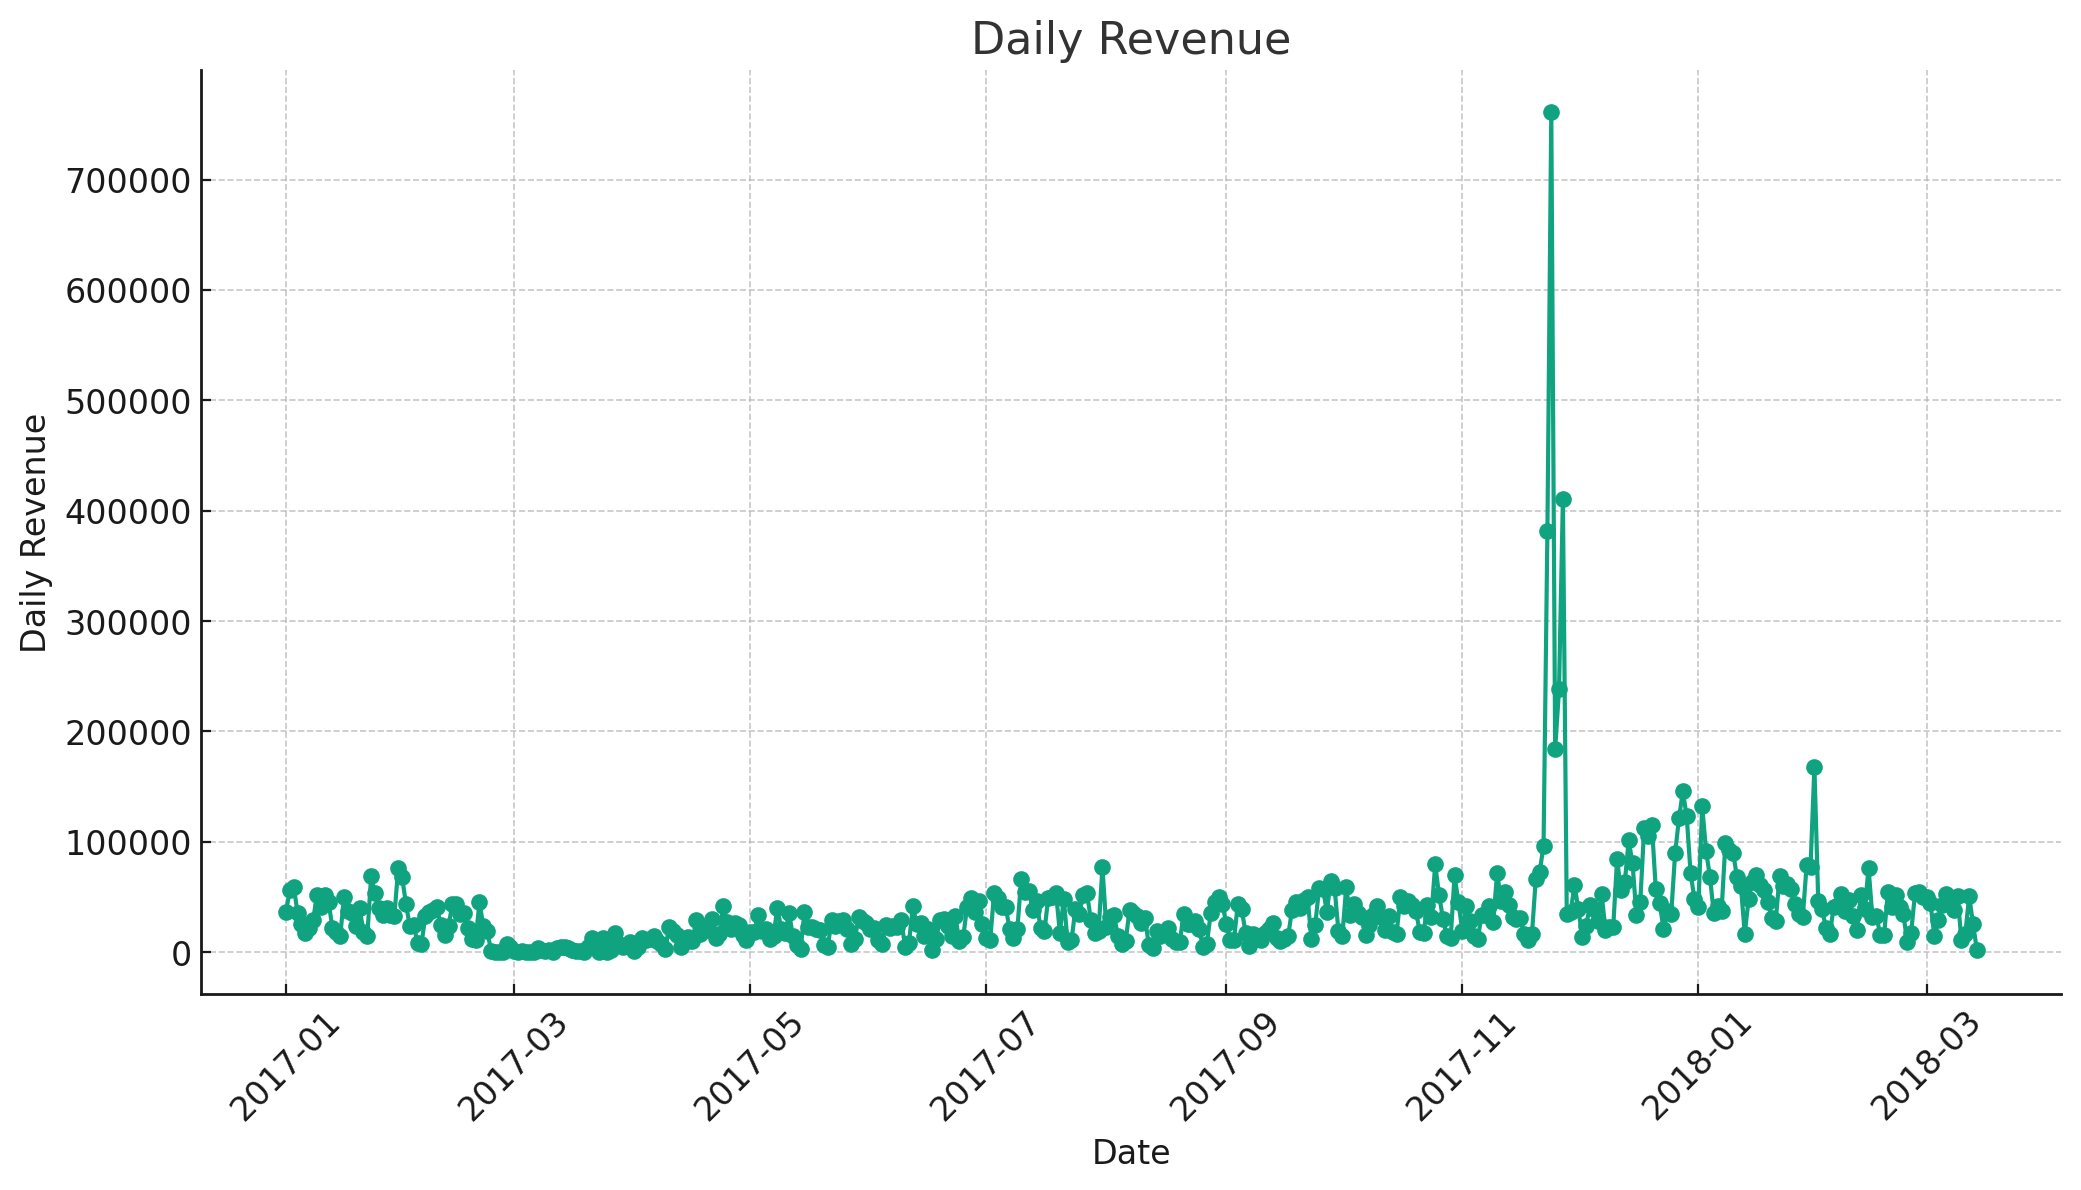

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
image_data = client.files.content('file-J34MB1LZKQNi3cOuWwFHVOHW')
image_data_bytes = image_data.read()
image_array = np.frombuffer(image_data_bytes, dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
cv2_imshow(image)

The binary file can also be written directly as a `.png`, which can then be reviewed by double-clicking the file in the working directory or downloaded to the local machine.

In [ ]:
with open("daily_revenue.png", "wb") as file:
    file.write(image_data_bytes)
files.download('daily_revenue.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Continuing the conversation

Since Assistants and Threads are persistant, we can save their data for later use. In this way, the context of a conversation can last over serveral sessions.

In [ ]:
my_conversation = {
    "assistant": assistant,
    "thread": thread
}
with open('my_conversation.pkl', 'wb') as f:
    pickle.dump(my_conversation, f)
files.download('my_conversation.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>